In [1]:
#  TASK 0: Setup Environment
!pip install qiskit qiskit_aer --quiet

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.6 MB/s eta 0:00:00


In [2]:
#  TASK 0A: Define Oracle, Diffuser, and Runner Functions
def oracle(qc, n, marked_state):
    """Constructs the oracle for the marked state."""
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

def diffuser(qc, n):
    """Implements the Grover diffuser."""
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))

def grover_search(marked_state, iterations=1):
    """Builds Grover's search circuit for a given marked state and iteration count."""
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    for _ in range(iterations):
        oracle(qc, n, marked_state)
        diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

def run_grover(qc):
    """Runs the circuit on the simulator and shows histogram."""
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()


**Task 1:Change the marked state**

In [4]:
marked_state = "010"  # Change to "001", "010", etc.
print(f"🔍 Searching for marked state: {marked_state}")
qc = grover_search(marked_state)
print(qc.draw(fold=-1))
run_grover(qc)


🔍 Searching for marked state: 010
     ┌───┐┌───┐          ┌───┐┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤└───┘       │  ├───┤├───┤└───┘            │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├────────────■──┤ H ├┤ X ├─────────────────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/══════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                       0  1  2 


**Task 2:Modify the number of qubits**

In [5]:
marked_state = "1010"  # 4-bit marked state

def oracle_4qubit(qc, n, marked_state):
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

def grover_search_4qubit(marked_state):
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle_4qubit(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

qc4 = grover_search_4qubit(marked_state)
print(qc4.draw(fold=-1))
run_grover(qc4)


     ┌───┐               ┌───┐┌───┐                    ┌───┐┌───┐     ┌─┐         
q_0: ┤ H ├────────────■──┤ H ├┤ X ├─────────────────■──┤ X ├┤ H ├─────┤M├─────────
     ├───┤┌───┐       │  ├───┤├───┤┌───┐            │  ├───┤├───┤     └╥┘┌─┐      
q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├────────────■──┤ X ├┤ H ├──────╫─┤M├──────
     ├───┤└───┘       │  ├───┤├───┤└───┘            │  ├───┤├───┤      ║ └╥┘┌─┐   
q_2: ┤ H ├────────────■──┤ H ├┤ X ├─────────────────■──┤ X ├┤ H ├──────╫──╫─┤M├───
     ├───┤┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐ ║  ║ └╥┘┌─┐
q_3: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║  ║ └╥┘
c: 4/══════════════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                                       0  1  2  3 


**Task 3: Add multiple iterations**

In [6]:
marked_state = "101"
iterations = 3  # Try 1, 2, 3 iterations and compare results
print(f" Grover's Algorithm with {iterations} iterations for marked state '{marked_state}'")
qc = grover_search(marked_state, iterations)
print(qc.draw(fold=-1))
run_grover(qc)


 Grover's Algorithm with 3 iterations for marked state '101'
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐               ┌───┐┌───┐               ┌───┐┌───┐               ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├────────────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├────────────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H 

**Task 4: Circuit Visualization**

In [7]:
!pip install pylatexenc --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [8]:
!pip install qiskit qiskit_aer pylatexenc --quiet


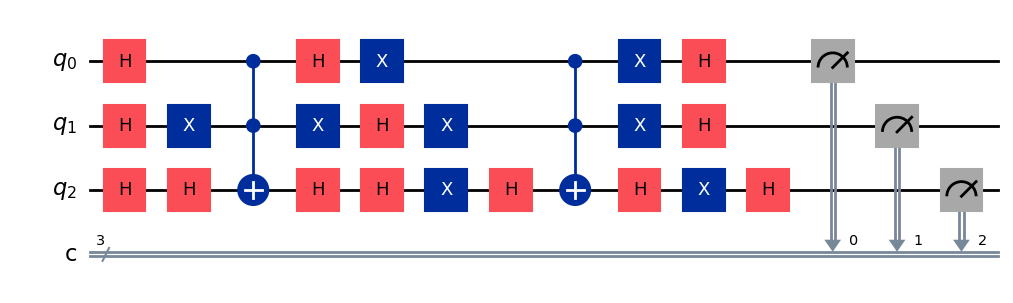

In [9]:
marked_state = "101"
qc = grover_search(marked_state)
qc.draw('mpl')

**Task 5: Add a Noise Model and compare results with the ideal simulator**

Grover's Algorithm with Noise Model (Results):
{'000': 110, '010': 88, '100': 129, '001': 133, '111': 130, '011': 116, '101': 192, '110': 126}


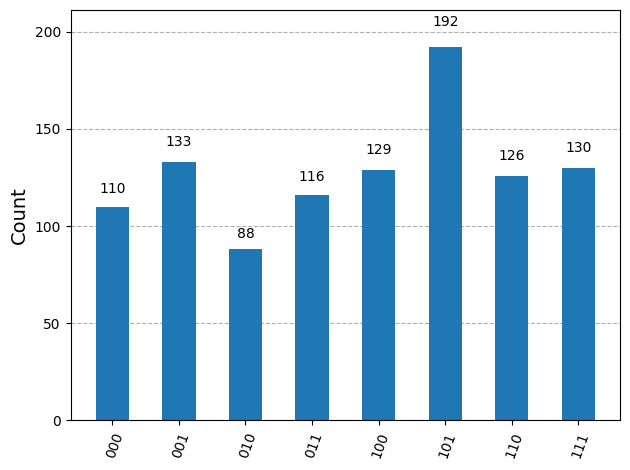

In [14]:
# TASK 5: Add a Noise Model and compare results with the ideal simulator
!pip install qiskit qiskit-aer matplotlib pylatexenc --quiet

# --- Imports ---




from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from IPython.display import display

# --- Ensure inline display ---
%matplotlib inline

# --- Define Grover function ---
def grover_search(marked_state):
    n = len(marked_state)
    qc = QuantumCircuit(n + 1, n)
    qc.h(range(n))
    qc.x(n)
    qc.h(n)
    qc.barrier()
    # Oracle
    for i, bit in enumerate(marked_state):
        if bit == '0':
            qc.x(i)
    qc.mcx(list(range(n)), n)
    for i, bit in enumerate(marked_state):
        if bit == '0':
            qc.x(i)
    qc.barrier()
    # Diffuser
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))
    qc.barrier()
    qc.measure(range(n), range(n))
    return qc

#  Create noise model
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.05, 1), ['x', 'h'])
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.1, 2), ['cx'])

#  Run noisy Grover simulation
marked_state = "101"
qc = grover_search(marked_state)
simulator = AerSimulator(noise_model=noise_model)
compiled = transpile(qc, simulator)
result = simulator.run(compiled, shots=1024).result()
counts = result.get_counts()

# Display results
print("Grover's Algorithm with Noise Model (Results):")
print(counts)
display(plot_histogram(counts))